In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('data/CollectionDatasets/Movie_classification.csv', encoding='utf-8')
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,NO,186.96,243.584,Action,27,561,44800,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,YES,132.24,263.296,Action,20,600,41200,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,NO,109.56,243.824,Comedy,31,576,47800,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,YES,158.80,303.520,Comedy,47,607,44000,0


In [3]:
df.isna().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [4]:
df['Time_taken'].fillna(df['Time_taken'].median(),inplace=True)

In [5]:
df.dtypes

Marketing expense      float64
Production expense     float64
Multiplex coverage     float64
Budget                 float64
Movie_length           float64
Lead_ Actor_Rating     float64
Lead_Actress_rating    float64
Director_rating        float64
Producer_rating        float64
Critic_rating          float64
Trailer_views            int64
3D_available            object
Time_taken             float64
Twitter_hastags        float64
Genre                   object
Avg_age_actors           int64
Num_multiplex            int64
Collection               int64
Start_Tech_Oscar         int64
dtype: object

In [6]:
print(df['3D_available'].unique())
print(df['Genre'].unique())

['YES' 'NO']
['Thriller' 'Drama' 'Comedy' 'Action']


In [7]:
del df['3D_available']
del df['Genre']

In [13]:
#df['3D_available'] = df['3D_available'].astype('category').cat.codes
#df = pd.get_dummies(data=df, columns=['Genre'])

C:\Users\ishih\AppData\Local\Temp\ipykernel_8100\2956911449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['3D_available'] = df['3D_available'].astype('category').cat.codes


In [8]:
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,186.96,243.584,27,561,44800,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,132.24,263.296,20,600,41200,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,109.56,243.824,31,576,47800,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,158.80,303.520,47,607,44000,0


<AxesSubplot:>

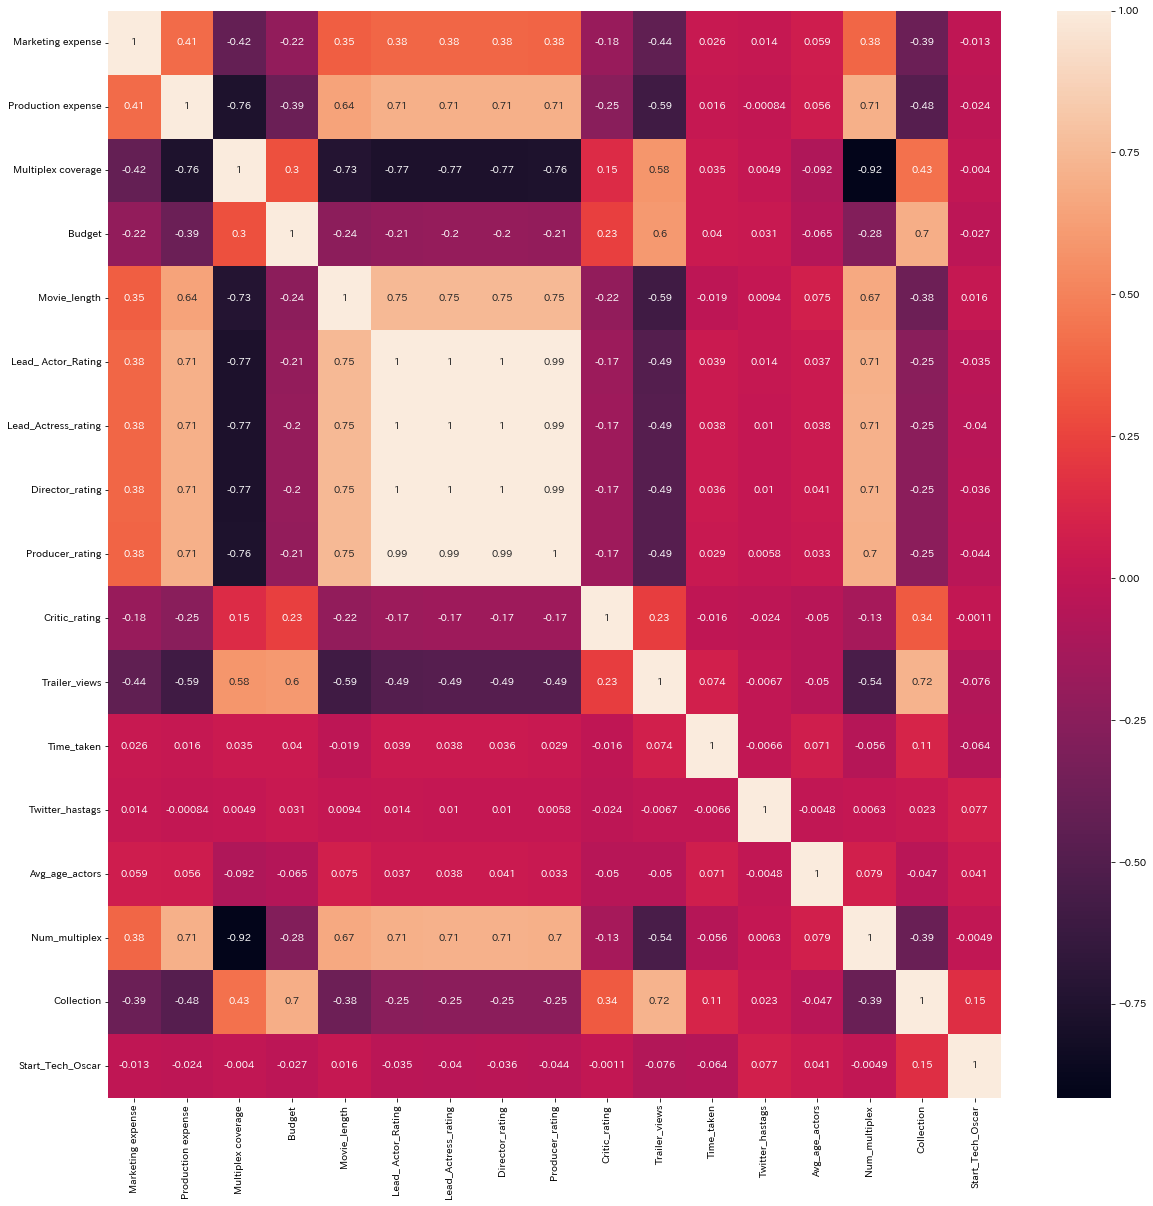

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [10]:
X = df.drop('Start_Tech_Oscar', axis=1)
y = df['Start_Tech_Oscar']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(404, 16)
(102, 16)


In [19]:
models = [linear_model.LogisticRegression(),
          neighbors.KNeighborsClassifier(),
          svm.SVC(),
          naive_bayes.GaussianNB(),
          tree.DecisionTreeClassifier(max_depth=3),
          ensemble.RandomForestClassifier(max_depth=3),
          ensemble.GradientBoostingClassifier()]

In [20]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp


,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.618812,0.643519,0.643519,0.643519,0.607843,0.678571,0.633333,0.655172
1,KNeighborsClassifier,0.730198,0.721992,0.805556,0.761488,0.500000,0.571429,0.600000,0.585366
2,SVC,0.534653,0.534653,1.000000,0.696774,0.588235,0.588235,1.000000,0.740741
3,GaussianNB,0.599010,0.821429,0.319444,0.460000,0.519608,0.720000,0.300000,0.423529
4,DecisionTreeClassifier,0.641089,0.961039,0.342593,0.505119,0.529412,0.750000,0.300000,0.428571
5,RandomForestClassifier,0.750000,0.786070,0.731481,0.757794,0.607843,0.666667,0.666667,0.666667
6,GradientBoostingClassifier,0.992574,0.995349,0.990741,0.993039,0.588235,0.645161,0.666667,0.655738


In [21]:
X_train.dtypes[X_train.dtypes != 'uint8'].index

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex',
       'Collection'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler

scaling_columns = X_train.dtypes[X_train.dtypes != 'uint8'].index
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [23]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.663366,0.700000,0.648148,0.673077,0.656863,0.727273,0.666667,0.695652
1,KNeighborsClassifier,0.754950,0.779904,0.754630,0.767059,0.607843,0.666667,0.666667,0.666667
2,SVC,0.757426,0.795000,0.736111,0.764423,0.627451,0.696429,0.650000,0.672414
3,GaussianNB,0.601485,0.772277,0.361111,0.492114,0.578431,0.793103,0.383333,0.516854
4,DecisionTreeClassifier,0.641089,0.961039,0.342593,0.505119,0.539216,0.782609,0.300000,0.433735
5,RandomForestClassifier,0.759901,0.769231,0.787037,0.778032,0.617647,0.666667,0.700000,0.682927
6,GradientBoostingClassifier,0.992574,0.995349,0.990741,0.993039,0.588235,0.645161,0.666667,0.655738


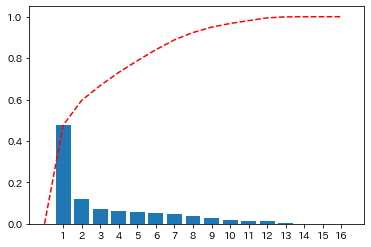

In [24]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [25]:
n = 8
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

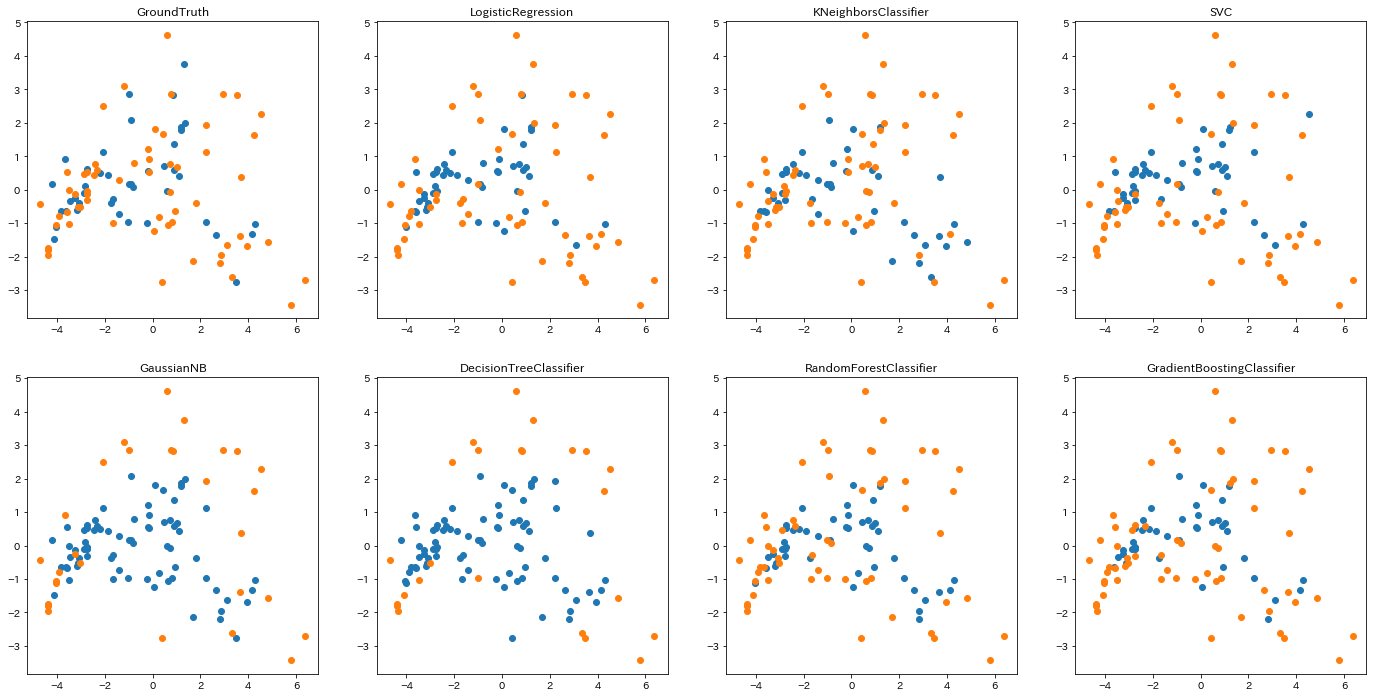

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.663366,0.700000,0.648148,0.673077,0.656863,0.727273,0.666667,0.695652
1,KNeighborsClassifier,0.754950,0.779904,0.754630,0.767059,0.607843,0.666667,0.666667,0.666667
2,SVC,0.757426,0.795000,0.736111,0.764423,0.627451,0.696429,0.650000,0.672414
3,GaussianNB,0.601485,0.772277,0.361111,0.492114,0.578431,0.793103,0.383333,0.516854
4,DecisionTreeClassifier,0.641089,0.961039,0.342593,0.505119,0.529412,0.750000,0.300000,0.428571
5,RandomForestClassifier,0.757426,0.827778,0.689815,0.752525,0.578431,0.654545,0.600000,0.626087
6,GradientBoostingClassifier,0.992574,0.995349,0.990741,0.993039,0.588235,0.645161,0.666667,0.655738


In [26]:
df_model_comp = pd.DataFrame()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24.0,12.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for i, model in enumerate(models):
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
    for j in np.unique(y_pred):
        X_tmp = X_test_pca[y_pred == j]
        ax[i+1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
    ax[i+1].set_title(model.__class__.__name__)
plt.show()

df_model_comp